In [1]:
import os 
from bio_compose.verifier import Verifier

v = Verifier()

In [2]:
output = {'content': {'results': {'a': {}}}}

output['content'].get('results').get('rmse', {}) 

{}

In [7]:
jobid = 'verification-bio_check-request-0cdbb5cd-acc4-411e-86aa-36a842fe2a00-6903713f-429d-4418-a347-04bc36de31b8'
data = v.visualize_rmse(job_id=jobid)

data

/Users/alexanderpatrie/Desktop/repos/bio-compose/bio_compose/data_model.py:246: UserWarning: The job for verification-bio_check-request-0cdbb5cd-acc4-411e-86aa-36a842fe2a00-6903713f-429d-4418-a347-04bc36de31b8 is either not ready or has an error in rmse scoring. Please check the output.
  warn(str(e))


{}

In [4]:
jobid2 = 'simulation-execution-utc08d80451-07aa-4778-9bd3-bb887c6c815c'
v.visualize_rmse(job_id=jobid2)

/Users/alexanderpatrie/Desktop/repos/bio-compose/bio_compose/data_model.py:246: UserWarning: The job for simulation-execution-utc08d80451-07aa-4778-9bd3-bb887c6c815c is either not ready or has an error in rmse scoring. Please check the output.
  return warn(str(e))


In [3]:
omex_fp = './fixtures/sbml-core/edelstein.omex'
omex_fp2 = './fixtures/sbml-core/Elowitz-Nature-2000-Repressilator.omex'
sbml_fp = './fixtures/sbml-core/BIOMD0000000001_url.xml'
sims = ['copasi', 'tellurium']
start = 0
stop = 100
steps = 1000

In [4]:
from bio_compose import verify

model_name = omex_fp2.split('/')[-1].split('.')[0]
omex_result = verify(omex_fp2, sims)
# sub = v.verify_sbml(entrypoint=sbml_fp, start=start, end=stop, steps=steps, simulators=sims)

model_name

Submission Results for Job ID verification-bio_check-request-e74e0919-bbbb-4a01-8ad5-6b3eccf0e91d-e0038f97-3c47-4acf-a812-89695a2ec13b: 
Status for job ending in c13b: SUBMITTED:PENDING
Status for job ending in c13b: SUBMITTED:IN_PROGRESS


'Elowitz-Nature-2000-Repressilator'

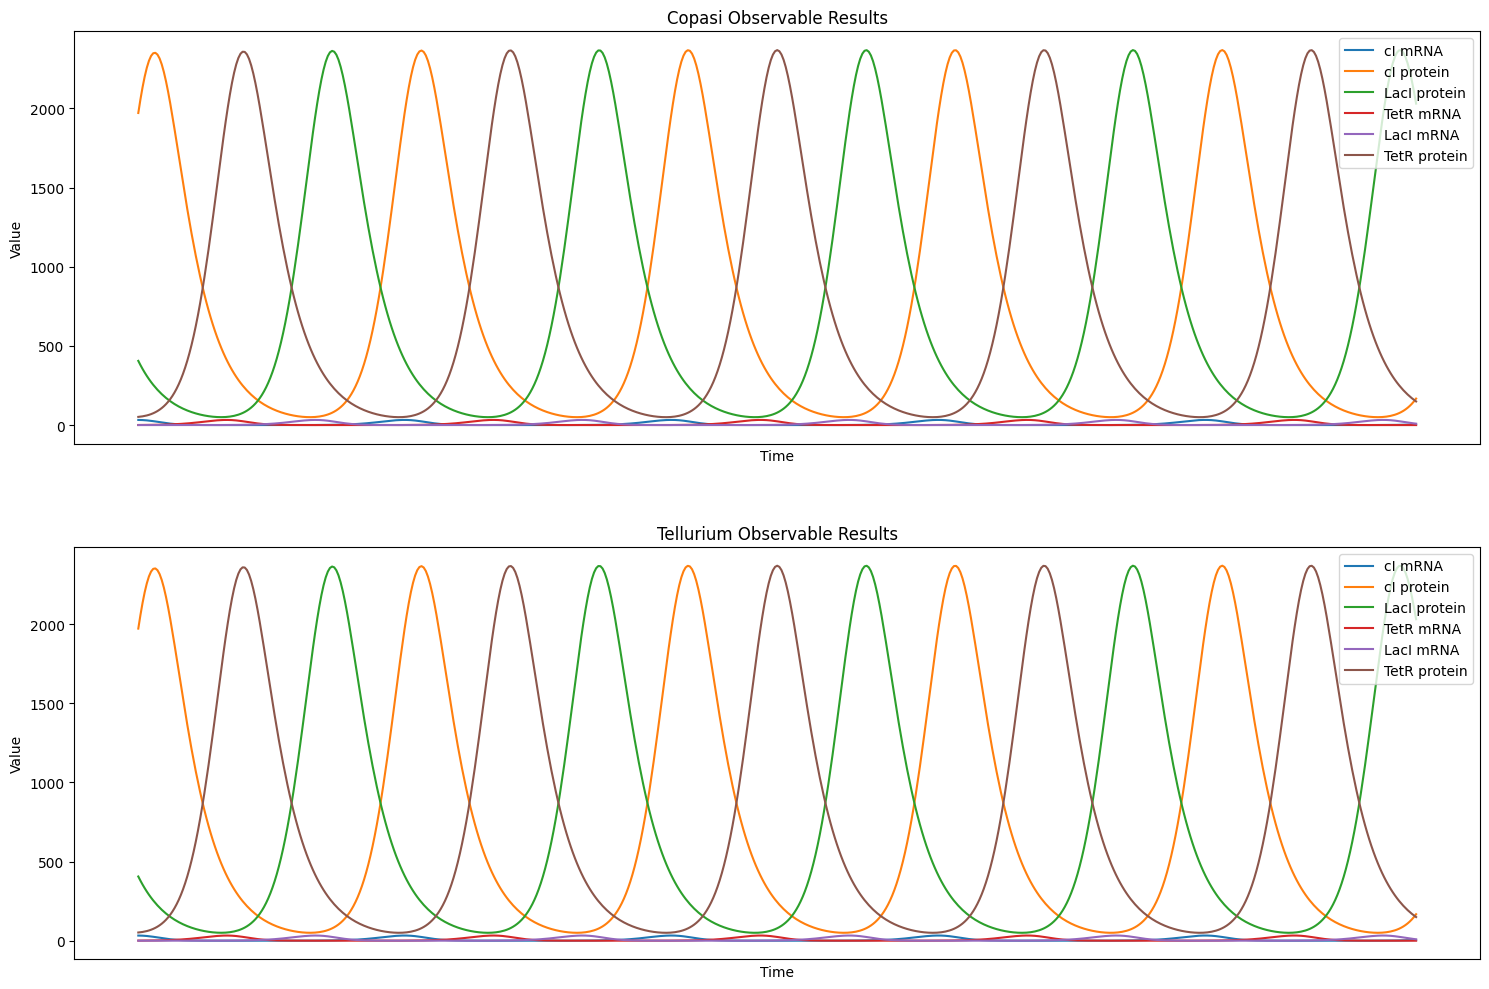

In [5]:
obs = omex_result.observables(save_dest=f'./{model_name}_observables')

In [6]:
obs.keys()

dict_keys(['cI mRNA', 'cI protein', 'LacI protein', 'TetR mRNA', 'LacI mRNA', 'TetR protein'])

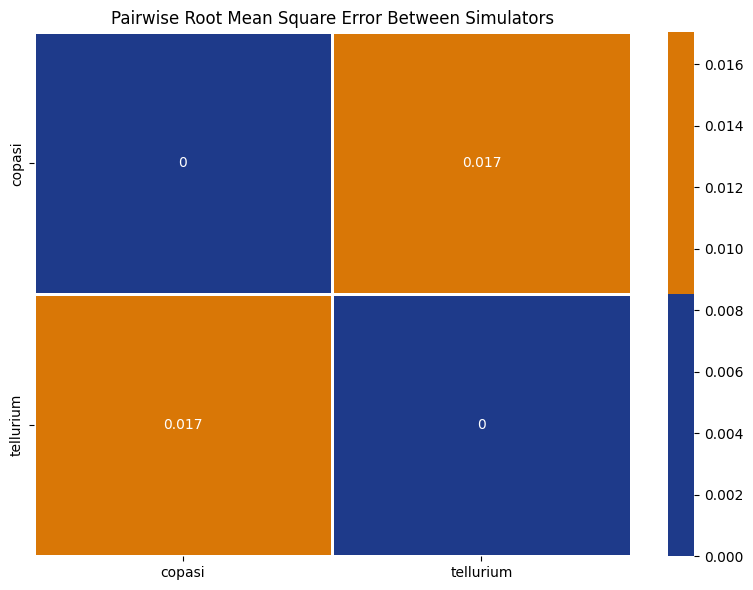

In [7]:
rmse = omex_result.rmse(save_dest=f'./{model_name}_rmse')

In [8]:
!ls .

BIOMD0000000005_url_copasi_observables.pdf
Elowitz-Nature-2000-Repressilator_observables.pdf
Elowitz-Nature-2000-Repressilator_rmse.pdf
__init__.py
__pycache__
fixtures
main.py
observables.pdf
plot.pdf
rmse.pdf
rmse_verification-bio_check-request-16f353d4-c621-416d-8ad9-9137ea4beddf-6f2afece-5fe7-40de-9857-beccae7da841.pdf
rmse_verification-bio_check-request-6dfe02cf-9bdb-4872-9ee1-314433cee92c-850495e3-3d58-4636-a7a0-4a61dc9eb39b.pdf
rmse_verification-bio_check-request-811a8269-2c92-4c79-a802-859afd2d60eb-88e12855-cf9b-4f59-8fe9-cd9e47587402.pdf
test.ipynb


In [9]:
rmse

{'copasi': [0.0, 0.017044481673007456],
 'tellurium': [0.017044481673007456, 0.0]}

In [10]:
from bio_compose import run_simulation

fp = '/Users/alexanderpatrie/Desktop/repos/bio-compose/tests/fixtures/sbml-core/BIOMD0000000005_url.xml'
sbml_results = run_simulation(fp, 0, 10, 100, 'copasi')
model_name = fp.split("/")[-1].split(".")[0]

Submission Results for Job ID simulation-execution-utc08d80451-07aa-4778-9bd3-bb887c6c815c: 
Status for job ending in 815c: SUBMITTED:PENDING
Status for job ending in 815c: SUBMITTED:PENDING


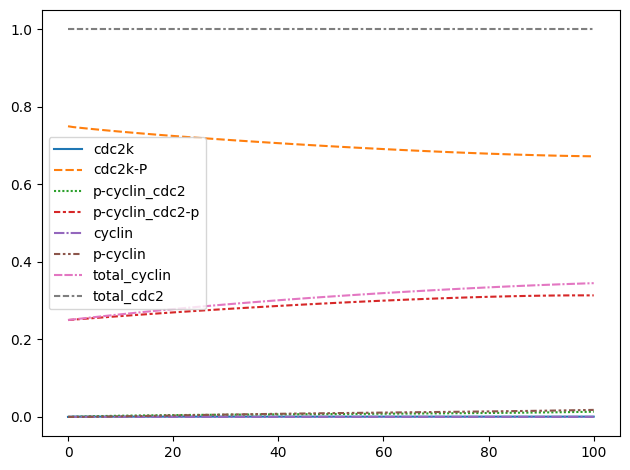

In [11]:
obs = sbml_results.visualize(save_dest=f'./{model_name}_copasi_observables')

In [12]:
obs

{'cdc2k': [0.0,
  0.0007478746387673067,
  0.0007464394611934366,
  0.0007450417001108195,
  0.0007436782846031465,
  0.0007423465114338508,
  0.0007410439911054741,
  0.0007397686034399505,
  0.0007385184612105365,
  0.0007372918786935165,
  0.0007360873458947338,
  0.0007349035070236264,
  0.0007337391416082762,
  0.0007325931482458041,
  0.0007314645310812513,
  0.0007303523882148975,
  0.0007292559014384724,
  0.0007281743273459908,
  0.0007271069892603773,
  0.0007260532709255138,
  0.0007250126101923744,
  0.0007239844940406099,
  0.0007229684538823626,
  0.0007219640614311211,
  0.0007209709250603264,
  0.0007199886865851248,
  0.0007190170183736251,
  0.0007180556208171772,
  0.0007171042201018367,
  0.0007161625659230495,
  0.0007152304300043566,
  0.00071430760437219,
  0.0007133939003154772,
  0.0007124891453197446,
  0.0007115931823095287,
  0.0007107058699316252,
  0.0007098270810604023,
  0.0007089566977931807,
  0.0007080946209508922,
  0.0007072407605162503,
  0.0007063

In [ ]:
rmse = v.

In [ ]:
from bio_compose.runner import SimulationRunner, SimulationResult
start = 0
end = 10
steps = 100
simulator = 'copasi'
runner = SimulationRunner()
# utc_result = runner.run_utc_simulation(sbml_filepath=fp, start=start, end=end, steps=steps, simulator=simulator)

In [ ]:
utc_result

In [ ]:
data = runner.get_output('simulation-execution-utcd9a73345-0ae8-45d5-b03d-3a7ad273b6b2')

result = SimulationResult(data)

In [ ]:
result.job_id

In [5]:
v.get_output('verification-bio_check-request-a40e7cf2-c704-4cb6-89a3-c8b9ff034934-44c2b40c-d7b1-46ac-82e0-bb7cb7f523f8')

{'content': {'job_id': 'verification-bio_check-request-a40e7cf2-c704-4cb6-89a3-c8b9ff034934-44c2b40c-d7b1-46ac-82e0-bb7cb7f523f8',
  'timestamp': '2024-09-06 04:21:27.765985',
  'status': 'COMPLETED',
  'results': {'Y': {'mse': {'amici': {'amici': 0.0,
      'copasi': 3.3792986348992197e-19,
      'tellurium': 1.1421292383284316e-18},
     'copasi': {'amici': 3.3792986348992197e-19,
      'copasi': 0.0,
      'tellurium': 2.5626951621647453e-19},
     'tellurium': {'amici': 1.1421292383284316e-18,
      'copasi': 2.5626951621647453e-19,
      'tellurium': 0.0}},
    'proximity': {'amici': {'amici': True, 'copasi': True, 'tellurium': True},
     'copasi': {'amici': True, 'copasi': True, 'tellurium': True},
     'tellurium': {'amici': True, 'copasi': True, 'tellurium': True}},
    'output_data': {'amici': [0.0,
      0.00010027114652816835,
      0.00010046432691371343,
      0.00010065313392021708,
      0.00010083796628291788,
      0.00010101914767327869,
      0.00010119696440421352,

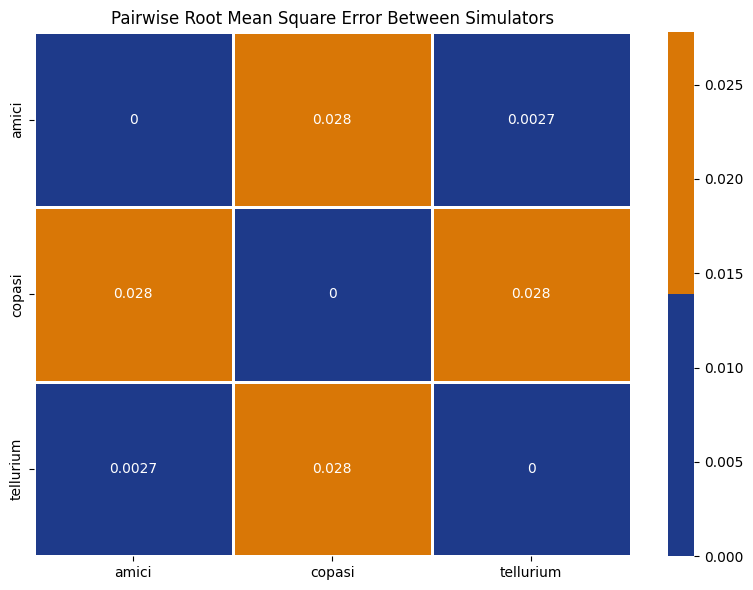

In [4]:
data = v.visualize_rmse('verification-bio_check-request-a40e7cf2-c704-4cb6-89a3-c8b9ff034934-44c2b40c-d7b1-46ac-82e0-bb7cb7f523f8')

In [5]:
data

{'amici': [0.0, 0.027765716580250916, 0.0027314688873684495],
 'copasi': [0.027765716580250916, 0.0, 0.027755559445289364],
 'tellurium': [0.0027314688873684495, 0.027755559445289364, 0.0]}